No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


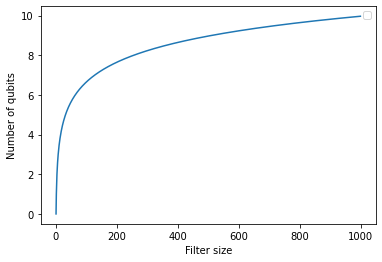

In [5]:
import matplotlib.pyplot as plt
import numpy as np
x = list(range(1, 1000))
y = []
for i in x:
    y.append((np.log2(i)))

plt.plot(x, y)
plt.ylabel("Number of qubits")
plt.xlabel("Filter size")
plt.legend()

In [41]:
import classical_part, entangled_circuit, numpy as np
import matplotlib.pyplot as plt


def plotDistributionDataset(datasetLoadFunction, datasetName):
    counts_train = []
    counts_val = []
    counts_test = []
    for _ in range(0, 20):
        _, y_train, _, y_val, _, y_test = datasetLoadFunction(
                1200, 300, 300, None)
        y_train = list(np.argmax(y_train, axis=1))
        y_val = list(np.argmax(y_val, axis=1))
        y_test = list(np.argmax(y_test, axis=1))

        temp_train = np.zeros((10))
        temp_val = np.zeros((10))
        temp_test = np.zeros((10))
        for i in range(0, 10):
            temp_train[i] = y_train.count(i)
            temp_val[i] += (y_val.count(i))
            temp_test[i] += (y_test.count(i))
        counts_train.append(temp_train)
        counts_val.append(temp_val)
        counts_test.append(temp_test)
    counts_train = np.asarray(counts_train)
    counts_val = np.asarray(counts_val)
    counts_test = np.asarray(counts_test)
    labels = range(0, 10)
    train_means = np.mean(counts_train, axis = 0)
    val_means = np.mean(counts_val, axis = 0)
    test_means = np.mean(counts_test, axis = 0)
    train_std = np.std(counts_train, axis = 0)
    val_std = np.std(counts_val, axis = 0)
    test_std = np.std(counts_test, axis = 0)
    width = 0.35       # the width of the bars: can also be len(x) sequence

    fig, ax = plt.subplots()

    ax.bar(labels, train_means, width, yerr=train_std, label='Train')
    ax.bar(labels, val_means, width, bottom = train_means, yerr=val_std, label='Val')
    ax.bar(labels, test_means, width, bottom = train_means + val_means, yerr=test_std, label='Test')

    ax.set_xticks(range(0, 10, 1))
    ax.set_yticks(range(0, 220, 50))
    ax.set_ylim(0, 220)
    ax.set_ylabel('# item')
    ax.set_title('Class ID (' + datasetName + ')', y= -0.15)
    ax.legend()
    
    plt.savefig('../thesis/eps/dataset_' + datasetName + '.svg', format = 'svg', dpi = 1000)


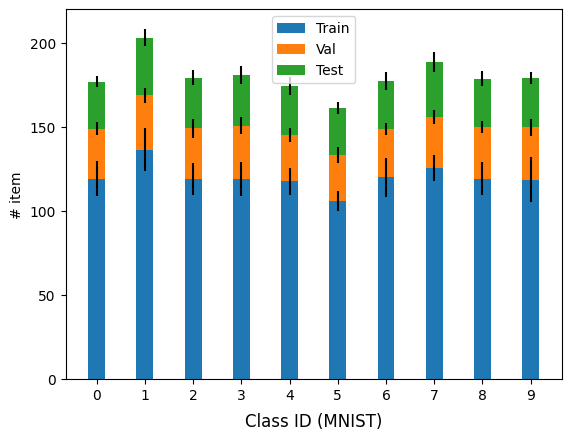

In [42]:
plotDistributionDataset(classical_part.load_mnist, 'MNIST')

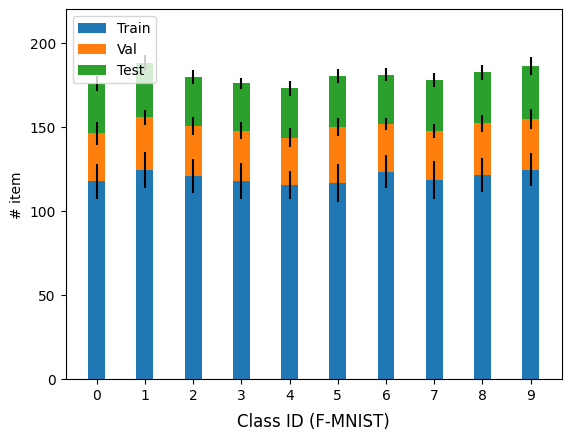

In [43]:
plotDistributionDataset(classical_part.load_mnist_fashion, 'F-MNIST')

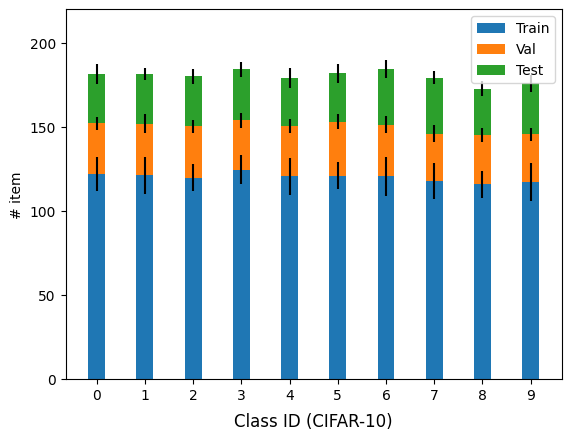

In [44]:
plotDistributionDataset(classical_part.load_cifar10, 'CIFAR-10')